<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [1]:
### v1.1

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

You'll be using the Happy House dataset for this part of the assignment, which contains images of peoples' faces. Your task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

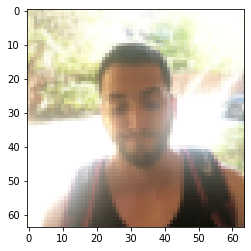

In [4]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [10]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    """
    model = tf.keras.Sequential([])
    model.add(tf.keras.Input(shape=(64, 64, 3)))
    model.add(tf.keras.layers.ZeroPadding2D(padding=(3, 3)))
    model.add(tf.keras.layers.Conv2D(32, 7, strides=(1, 1)))
    model.add(tf.keras.layers.BatchNormalization(axis=3))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    return model

In [11]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


Now that your model is created, you can compile it for training with an optimizer and loss of your choice. When the string `accuracy` is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make your life easier! If you'd like to read more on how the compiler operates, check the docs [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

In [12]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer. 

In [13]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [14]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 105ms/step - loss: 1.0382 - accuracy: 0.7233
Epoch 2/10
38/38 [==============================] - 4s 100ms/step - loss: 0.2023 - accuracy: 0.9133
Epoch 3/10
38/38 [==============================] - 4s 100ms/step - loss: 0.2056 - accuracy: 0.9183
Epoch 4/10
38/38 [==============================] - 4s 98ms/step - loss: 0.1899 - accuracy: 0.9267
Epoch 5/10
38/38 [==============================] - 4s 102ms/step - loss: 0.1274 - accuracy: 0.9533
Epoch 6/10
38/38 [==============================] - 4s 100ms/step - loss: 0.2126 - accuracy: 0.9133
Epoch 7/10
38/38 [==============================] - 4s 97ms/step - loss: 0.2690 - accuracy: 0.9100
Epoch 8/10
38/38 [==============================] - 4s 97ms/step - loss: 0.1233 - accuracy: 0.9683
Epoch 9/10
38/38 [==============================] - 4s 100ms/step - loss: 0.1035 - accuracy: 0.9683
Epoch 10/10
38/38 [==============================] - 4s 100ms/step - loss: 0.1171 - accuracy: 0.9583


After that completes, just use `.evaluate()` to evaluate against your test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [15]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 30ms/step - loss: 0.2671 - accuracy: 0.8667


[0.2671266794204712, 0.8666666746139526]

Easy, right? But what if you need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help you. 

Next up: Enter the Functional API, your slightly more complex, highly flexible friend.  

In [16]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 4


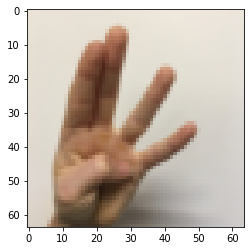

In [17]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### 4.2 - Split the Data into Train/Test Sets

In Course 2, you built a fully-connected network for this dataset. But since this is an image dataset, it is more natural to apply a ConvNet to it.

To get started, let's examine the shapes of your data. 

In [18]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [28]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    """

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tf.keras.layers.Conv2D(filters= 8 , kernel_size=4, padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters=16 , kernel_size=2, padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6 ,activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [29]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 12)        336       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 64, 64, 12)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 16)         

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model! 

<a name='4-4'></a>
### 4.4 - Train the Model

In [30]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=135, validation_data=test_dataset)

Epoch 1/135
17/17 [==============================] - 2s 117ms/step - loss: 1.7953 - accuracy: 0.1676 - val_loss: 1.7865 - val_accuracy: 0.1750
Epoch 2/135
17/17 [==============================] - 2s 107ms/step - loss: 1.7824 - accuracy: 0.1713 - val_loss: 1.7789 - val_accuracy: 0.2000
Epoch 3/135
17/17 [==============================] - 2s 108ms/step - loss: 1.7734 - accuracy: 0.2889 - val_loss: 1.7686 - val_accuracy: 0.2750
Epoch 4/135
17/17 [==============================] - 2s 112ms/step - loss: 1.7606 - accuracy: 0.3657 - val_loss: 1.7540 - val_accuracy: 0.4000
Epoch 5/135
17/17 [==============================] - 2s 112ms/step - loss: 1.7424 - accuracy: 0.3944 - val_loss: 1.7337 - val_accuracy: 0.4167
Epoch 6/135
17/17 [==============================] - 2s 112ms/step - loss: 1.7172 - accuracy: 0.4574 - val_loss: 1.7085 - val_accuracy: 0.4417
Epoch 7/135
17/17 [==============================] - 2s 112ms/step - loss: 1.6861 - accuracy: 0.5009 - val_loss: 1.6790 - val_accuracy: 0.4833

<a name='5'></a>
## 5 - History Object 

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at `history.history`: 

In [31]:
history.history

{'loss': [1.7952903509140015,
  1.7824418544769287,
  1.7734495401382446,
  1.7606333494186401,
  1.7423650026321411,
  1.7171516418457031,
  1.6861391067504883,
  1.6459252834320068,
  1.5986894369125366,
  1.5417687892913818,
  1.4761266708374023,
  1.4090991020202637,
  1.3401471376419067,
  1.272810935974121,
  1.2079217433929443,
  1.1454849243164062,
  1.085828423500061,
  1.030274510383606,
  0.98023521900177,
  0.9349709153175354,
  0.892986536026001,
  0.8553714156150818,
  0.8194513916969299,
  0.787134051322937,
  0.7571610808372498,
  0.7294624447822571,
  0.703799843788147,
  0.6795400977134705,
  0.657033383846283,
  0.635607123374939,
  0.6156095862388611,
  0.5973768830299377,
  0.5801082253456116,
  0.5638506412506104,
  0.5488913059234619,
  0.5347674489021301,
  0.5210133790969849,
  0.5078732371330261,
  0.49516668915748596,
  0.4835008978843689,
  0.47273650765419006,
  0.46184852719306946,
  0.45117607712745667,
  0.4407416582107544,
  0.43108007311820984,
  0.420

Now visualize the loss over time using `history.history`: 

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

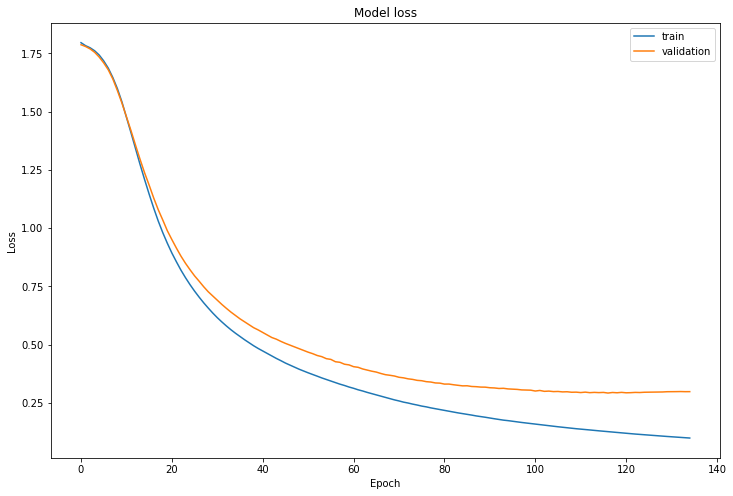

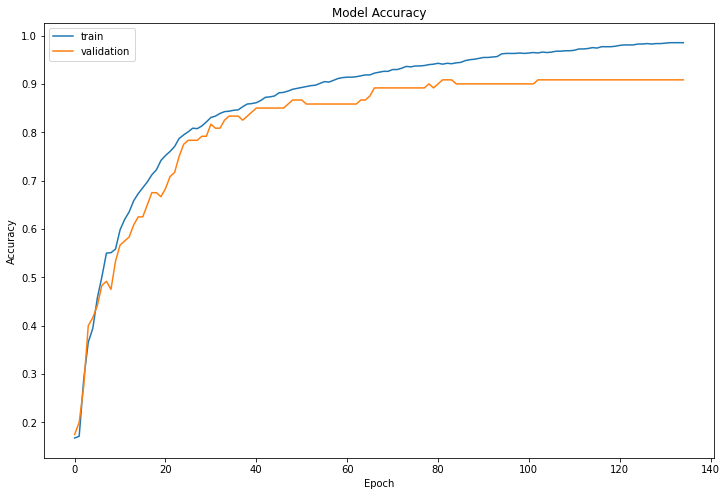

In [32]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

**Congratulations**! You've finished the assignment and built two models: One that recognizes  smiles, and another that recognizes SIGN language with almost 80% accuracy on the test set. In addition to that, you now also understand the applications of two Keras APIs: Sequential and Functional. Nicely done! 

By now, you know a bit about how the Functional API works and may have glimpsed the possibilities. In your next assignment, you'll really get a feel for its power when you get the opportunity to build a very deep ConvNet, using ResNets! 